In [36]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image, Latex
import ipywidgets as widgets
%matplotlib nbagg

# Vizinho esquecido

Nesta atividade, vamos considerar o seguinte problema:

>Você vai viajar e pede para um vizinho regar sua planta favorita. Sem água, a probabilidade de que a planta morra á de 80%. Com água, a probabilidade de ela morrer é de 15%. Você tem 90% de certeza que o seu vizinho vai lembrar de regar a planta.
>1. Qual é a probabilidade da sua planta estar viva quando você retornar?
>2. Se a planta estiver morta quando você voltar, qual é a probabilidade de que o seu vizinho esqueceu de regar a planta?

Vamos entender o que isso significa, através de conceitos clássicos de probabilidade.

## Espaço Amostral

Nosso experimento consiste em viajar e observar o que terá acontecido com nossa planta ao voltarmos de viagem. O espaço amostral, isto é, o conjunto $\Omega$ que contém todas as possibilidades de resultado deste experimento contém dois resultados possíveis: ou nossa planta estará viva no nosso retorno (chamaremos isso de evento $A$), ou estará morta. 

Formalmente, em matemática, representamos um evento $A$ como um subconjunto do conjunto $\Omega$. Assim, a probabilidade do evento $A$ ocorrer pode ser vista como a proporção do subconjunto $A$ em relação ao conjunto $\Omega$. Claro que, para isso, precisamos de alguma maneira de *medir* o "tamanho" de cada um desses conjuntos (e é aí que entra a [Teoria da Medida](https://pt.wikipedia.org/wiki/Teoria_da_medida)). No nosso caso, podemos simplificar: estamos supondo que nossos conjuntos tem um número finito de elementos, e assim podemos definir o tamanho de cada conjunto como o número de elementos que ele possui. Denotamos isso por $\#A$ (a **cardinalidade** do conjunto $A$).

Observe assim que, como não há outro resultado possível, o evento "a planta está morta" é o *complementar* do evento $A$ em $\Omega$. Dizemos então que os eventos $A$ e $A^C$ definem uma *partição* de $\Omega$, já que 
- $\Omega = A\cup A^C$;
- $A\cap A^C=\emptyset$.

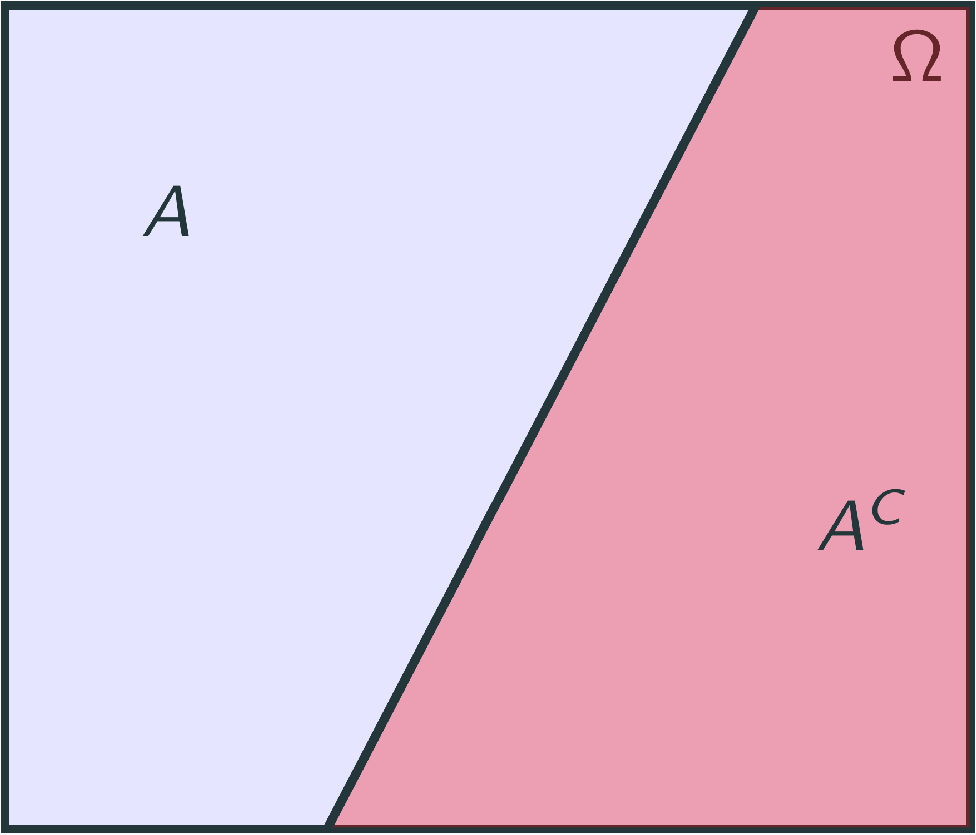

In [74]:
Image("../extra_files/partition1.png")

Além disso, mais dois eventos são interessantes para nós aqui: os eventos em que nosso vizinho lembrou-se de regar a planta (chamaremos $B$) ou o vizinho não se lembrou de regar a planta (assim como no caso anterior, não existe outra possibilidade; portanto este segundo caso é $B^C$, o complementar de $B$).

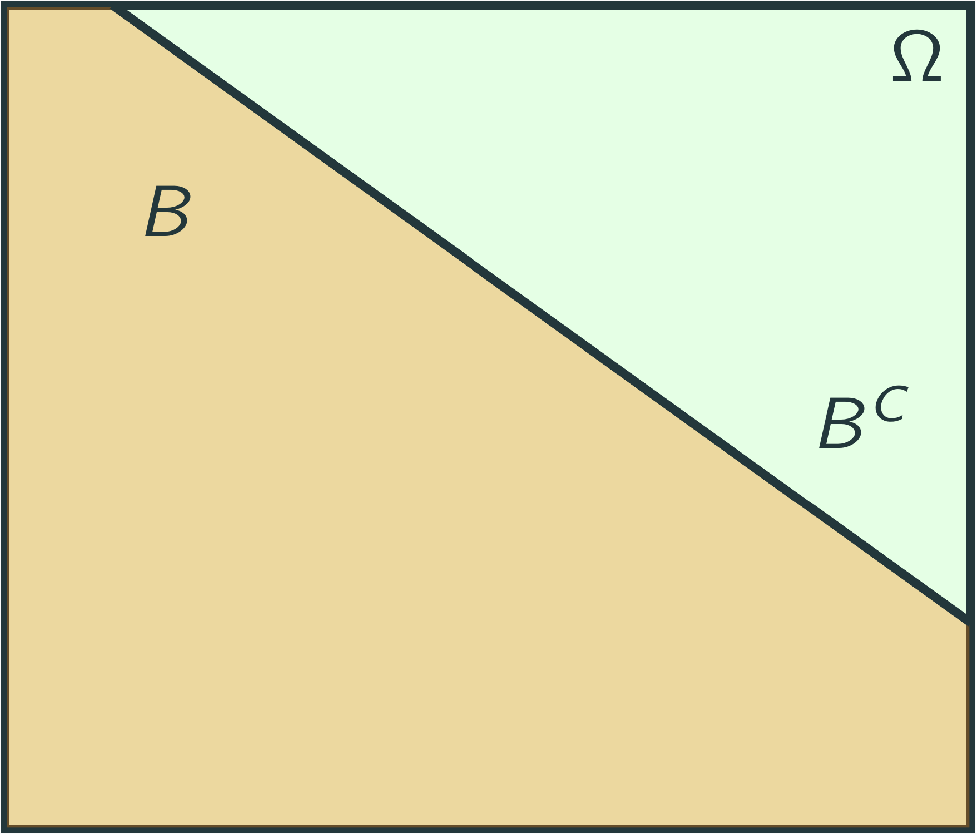

In [37]:
Image("../extra_files/partition2.png")

Juntando essas informações, teríamos algo assim:

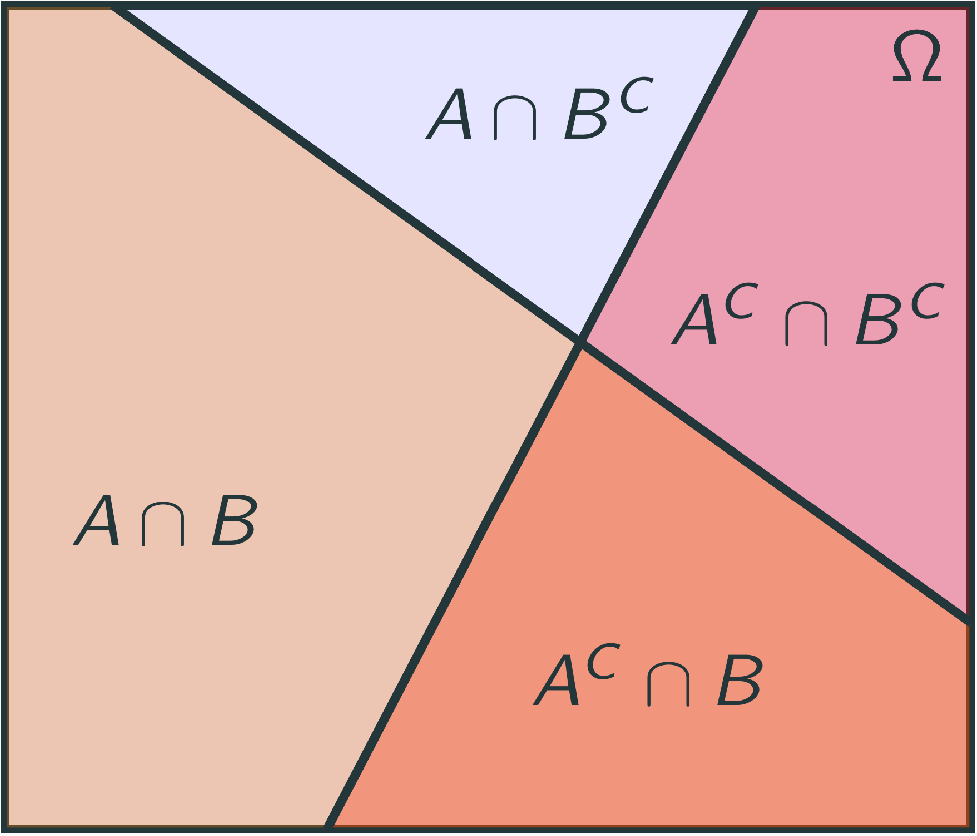

In [39]:
Image("../extra_files/intersections.png")

Você pode ver que isso subdivide nossos resultados possíveis do experimento em 4 subconjuntos; essa informação será importante para analisarmos o problema mais tarde.

### Experimento

O que o enunciado nos diz é que temos 90% de certeza de que o vizinho regará a planta. Assim, isso significa que a cada 100 viagens que fizéssemos, podemos esperar que apenas em 10 delas nosso vizinho esqueceria de regar a planta. Vamos fazer um simulador dessa situação.

In [2]:
def simula_viagem(n):
    resultado = []
    for i in range(n):
        probabilidades = ['A']*90 + ['B']*10
        resultado.append(random.choice(probabilidades))
    return resultado

In [3]:
resultado = simula_viagem(1000)

In [4]:
total_A = resultado.count('A')
total_A

909

Para visualizarmos isso, vamos usar um gráfico de pizza: a ideia é observar que, ao contrário do que diz nossa intuição, o fato de a probabilidade de o nosso vizinho regar a planta ser 90%, isso não significa que entre 100 viagens, ele regará a planta em exatamente 90 delas. O que isso significa é que o número de vezes em que nosso vizinho lembra de regar a planta *converge* para 90% à medida em que aumentamos o número de viagens. Falando rigorosamente, diremos que

$$ P(\text{evento desejado}) = \lim_{n\to \infty} \frac{\text{número de ocorrências desejadas}}{\text{número total de repetições do experimento}}$$

Agora, vamos experimentar com esse conceito. Escolha um número total de repetiçoes para nosso experimento ("viajar"):

In [5]:
n = 100

Vamos executar o experimento:

<IPython.core.display.Javascript object>


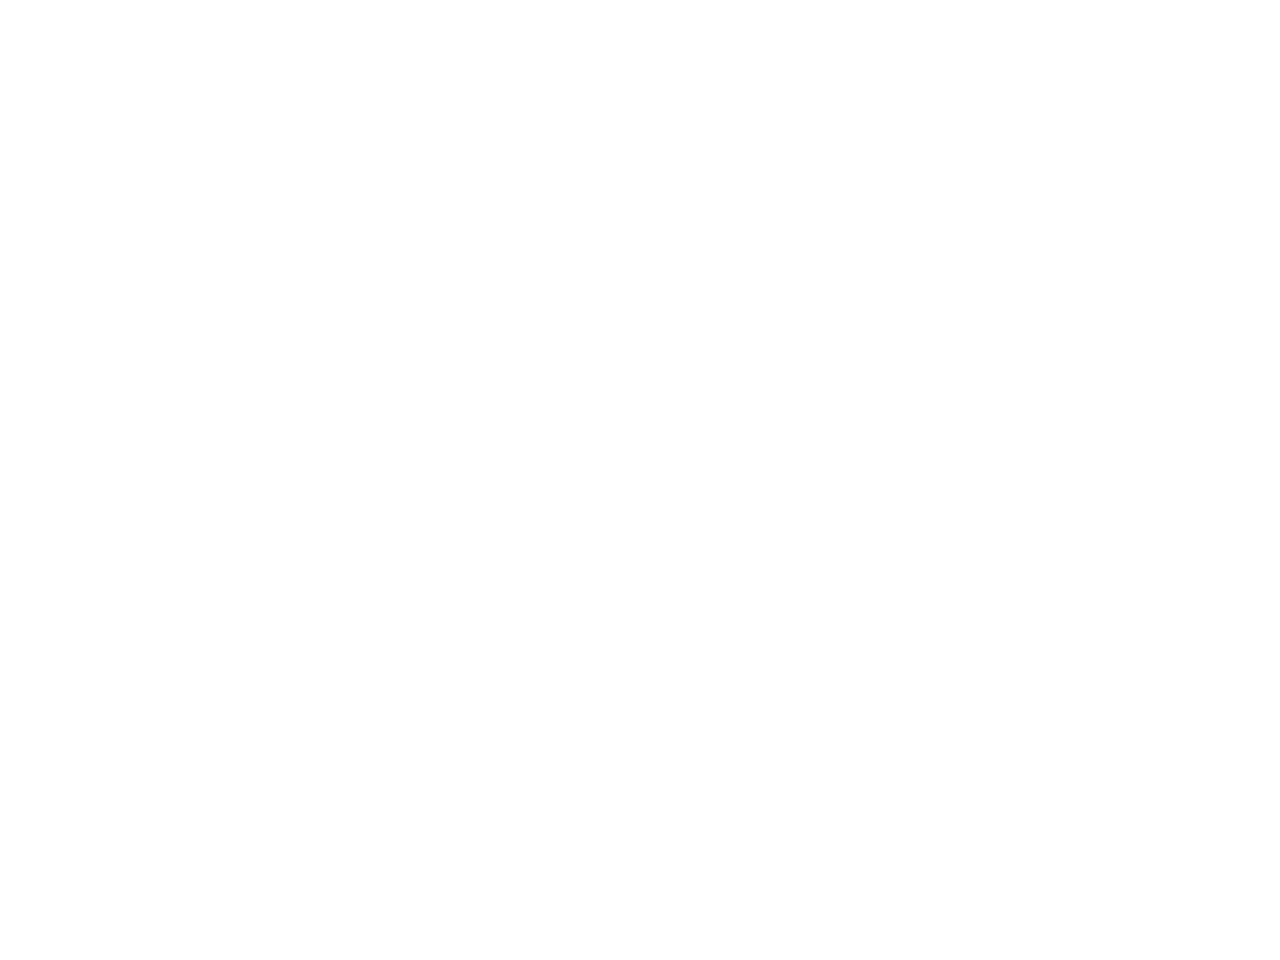

In [73]:
labels = ['A', 'B']
nums = [0, 0]

resultado = simula_viagem(n)

fig, ax = plt.subplots()
# The line below prevents an empty plot after the animation
plt.close()

def update(num):
    ax.clear()
    ax.axis('equal')
    n_a = resultado[0:num].count('A')
    ax.pie([n_a, num-n_a], labels=labels, startangle=140, autopct='%1.1f%%')
    ax.set_title('Viagem: {}'.format(num+1))

animated_pie = animation.FuncAnimation(fig, update, frames=range(n), repeat=False)
from IPython.display import HTML
HTML(animated_pie.to_jshtml())

Agora, vamos tentar uma outra visualização para esse mesmo experimento.

In [15]:
n = 100

In [7]:
resultado = simula_viagem(n)

xdata, ydata = [], []
fig2, ax2 = plt.subplots(figsize=(9,6))
ln = ax2.scatter([], [], 500, marker='.', animated=True)
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, n))
plt.close(fig2)

def init():
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(0, 1.1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.set_xticks([-0.25, 0.25])
    ax2.set_xticklabels(['A', 'B'])
    ax2.get_yaxis().set_visible(False)
    return ln,

def update(idx):
    xdata.append(bins[idx])
    ydata.append(counter[idx])
    colors = cmap(np.linspace(0, 1, len(xdata)))
    #offset = (np.arange(idx + 1) - idx + 29) / 30
    #y = np.maximum(ydata, offset)
    ln.set_offsets(np.array([xdata, ydata]).T)
    ln.set_facecolors(colors)
    return ln,

# bins return the indices of the bins to which each value in input array belongs.
# bins.shape = (n,)
# samples.shape = (n,)
# counter[idx] stores the index of the current sample in its respective bin;
# if the bin to which sample[idx] belongs is empty, it is the first to this
# bin, so counter[idx]=1
# else, if there are already n items in the bin, 
# counter[idx] = n+1
counter = np.zeros((n))  # y values
counts = np.zeros((2))  # keep track of how many points are already in each bin
bins = []
for idx in range(n):
    if resultado[idx] == 'A':
        counts[0] += 1
        bins.append(-0.25)
        counter[idx] = counts[0]
    else:
        counts[1] += 1
        bins.append(0.25)
        counter[idx] = counts[1]
counter = counter / n

# If you want to make a static plot, you can use
#ax2.scatter(bins, counter, 500, marker='.', facecolors=colors);

anim = animation.FuncAnimation(fig2, update, frames=n,
                     init_func=init, blit=True, interval=50)

ax2.text(-0.275, 1, resultado.count('A'), fontsize=11)
ax2.text(0.225, 0.3, n-resultado.count('A'), fontsize=11)

from IPython.display import HTML
HTML(anim.to_jshtml())

É claro que fazer essas simulações toma tempo. Por isso, para conjuntos finitos, vamos usar uma definição bem mais simples: se $A$ é o evento desejado,
$$P(A) = \frac{\#A}{\#\Omega}.$$

**Lembre-se: um modelo de probabilidade é sempre uma aproximação da realidade.**

## Probabilidade Condicionada

Vamos voltar para nosso problema:

>Sem água, a probabilidade de que a planta morra á de 80%. Com água, a probabilidade de ela morrer é de 15%. Você tem 90% de certeza que o seu vizinho vai lembrar de regar a planta.
>1. Qual é a probabilidade da sua planta estar viva quando você retornar?
>2. Se a planta estiver morta quando você voltar, qual é a probabilidade de que o seu vizinho esqueceu de regar a planta?

Em outras palavras, o que estamos procurando pode ser formalizado assim: dados dois eventos $A$ e $B$ em um espaço amostral $\Omega$, a probabilidade de $A$ e $B$ ocorrerem *ao mesmo tempo* é $P(A\cap B)$, ou seja
$$P(A\cap B) = \frac{\#(A\cap B)}{\#\Omega}.$$

Podemos representar isso no seguinte diagrama de Venn:

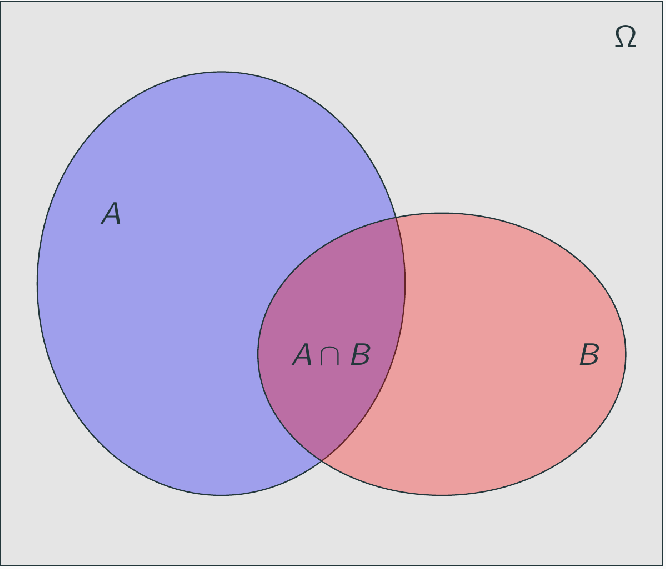

In [9]:
Image("../extra_files/condprob1.png")

Agora, se já sabemos com certeza que $A$ ocorreu, e queremos analisar qual é a probabilidade de $B$ ocorrer, queremos considerar apenas as ocorrências de $B$ que pertencem à intersecção entre $A$ e $B$. Assim, de fato, estamos considerando um espaço amostral reduzido:

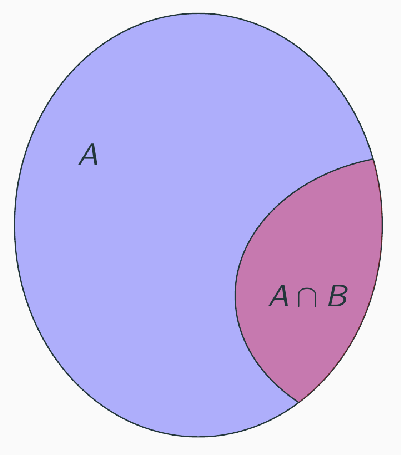

In [10]:
Image("../extra_files/condprob2.png")

Assim, temos que a probabilidade de $B$ ocorrer, dado que $A$ já ocorreu, é calculada por
$$P(B|A) = \frac{\#(A\cap B)}{\# A} = \frac{\#(A\cap B)}{\#\Omega} \frac{\#\Omega}{\#A} = \frac{P(A\cap B)}{P(A)}.$$

Lê-se $P(B|A)$ como *probabilidade de $B$ dado $A$*.

Vamos tentar entender o que está sendo pedido usando um Diagrama de Árvore de Probabilidades.

Observe que, do enunciado, temos 
- $P(\text{Planta sobreviveu}|\text{Vizinho esqueceu}) = \dfrac{20}{100}$
- $P(\text{Planta morreu}|\text{Vizinho esqueceu}) = \dfrac{80}{100}$
- $P(\text{Planta sobreviveu}|\text{Vizinho lembrou}) = \dfrac{85}{100}$
- $P(\text{Planta morreu}|\text{Vizinho lembrou}) = \dfrac{15}{100}$

Defina $A = \{$Planta sobreviveu$\}$; $B = \{$Vizinho lembrou$\}$.

In [72]:
from igraph import *

p1 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p1'))
with p1:
    display(Latex('$P(A|B^C) = $'))

caixa_p1 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p1'))

p2 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p2'))
with p2:
    display(Latex('$P(A^C|B^C) = $'))

caixa_p2 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p2'))

p3 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p3'))
with p3:
    display(Latex('$P(A|B) = $'))

caixa_p3 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p3'))

p4 = widgets.Output(layout=widgets.Layout(width='auto', grid_area='p4'))
with p4:
    display(Latex('$P(A^C|B) = $'))

caixa_p4 = widgets.Text(layout=widgets.Layout(width='150px', grid_area='caixa_p4'))

caixa_h1 = widgets.HBox(children=[p1, caixa_p1],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h2 = widgets.HBox(children=[p2, caixa_p2],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h3 = widgets.HBox(children=[p3, caixa_p3],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )
caixa_h4 = widgets.HBox(children=[p4, caixa_p4],
                        layout=widgets.Layout(width='50%', align_items='flex-start', justify_content='flex-start')
                        )

caixa_vertical = widgets.VBox(children=[caixa_h1, caixa_h2, caixa_h3, caixa_h4])
display(caixa_vertical)

def adicionar_prob(caixa):
    labels_list.append(caixa.value)
    
labels_list = ["90/100", "10/100"]
caixa_p1.on_submit(adicionar_prob)
caixa_p2.on_submit(adicionar_prob)
caixa_p3.on_submit(adicionar_prob)
caixa_p4.on_submit(adicionar_prob)

def show_graph(button):
    visual_style = {}
    edges = [(0,2),(0,1), (1,3), (1,4), (2,5), (2,6)]
    vertices = ["", "Esqueceu", "Lembrou", "Sobreviveu", "Morreu", "Sobreviveu", "Morreu"]
    g = Graph(vertex_attrs={"label": vertices, "label_size": 24}, edges=edges)
    # layout is a list of tuples containing X-Y coordinates
    layout = [(0,0), (1,1.5), (1,-1.5), (2,3), (2, 1), (2, -1), (2, -3)]
    visual_style["vertex_size"] = [150]
    g.vs["color"] = ["azure"]
    g.es["label"] = labels_list
    g.es["label_size"] = 20
    plot(g, bbox = (800, 800), margin = 100, **visual_style, layout=layout)

show_tree = widgets.Button(
                description='Mostrar árvore',
                tooltip='Mostrar árvore',
                layout=widgets.Layout(width='auto')
                )

show_tree.on_click(show_graph)
display(show_tree)

Button(description='Mostrar árvore', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='Mostrar árvore…

Os números associados a cada nó da árvore representam as *probabilidades condicionais* do evento associado. 

De volta ao nosso problema, a pergunta é: qual é a probabilidade da sua planta estar viva quando você retornar? 

Existem duas situações em que a planta está viva: se nosso amigo lembrou de regar a planta, e ela sobreviveu, ou se nosso amigo esqueceu de regar a planta, e mesmo assim ela sobreviveu. 

Esta situação pode ser ilustrada através do **Teorema das Probabilidades Totais**, que nos diz que 

*Se $E$ é um evento contido numa união de eventos disjuntos $A_1, A_2, \ldots, A_n$ e $P(A_i)>0$ para todo $i=1,2,  \ldots, n$, então*
    \begin{equation*}
        P(E) = P(A_1)P(E|A_1) + P(A_2)P(E|A_2) + \ldots + P(A_n)P(E|A_n).
    \end{equation*}
    
Logo, lembrando da figura que discutimos antes, como $B\cap B^C = \emptyset$, temos que

$$P(A) = P(A|B)P(B) + P(A|B^C)P(B^C)$$

Olhando para nosso diagrama de árvore, vemos que

$$P(A) = \frac{85}{100}\frac{90}{100}+\frac{20}{100}\frac{10}{100} = \frac{157}{200},$$

ou seja,

In [75]:
157/200

0.785

Para a segunda pergunta, temos: Se a planta estiver morta quando você voltar, qual é a probabilidade de que o seu vizinho esqueceu de regar a planta?

Aqui, precisamos inverter a posição dos eventos no cálculo das probabilidades totais. Logo, precisamos usar o Teorema de Bayes.